# Task 1: Acquire, preprocess, and analyze the data

Loading the DataSets

In [ ]:
import io
import pandas as pd
import numpy as np
from scipy.io import arff
from urllib import request
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from sklearn.model_selection import train_test_split

np.random.seed(1234)
url1 = "http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'

fstrm =request.urlopen(url2)
data2, meta = arff.loadarff(io.StringIO(fstrm.read().decode('utf-8')))
messidor_df=pd.DataFrame(data2)

hepatitis_df = pd.read_csv(url1, header=None)
print("Hepatitis Dataset:")
hepatitis_df.head()


Hepatitis Dataset:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Cleaning the datasets

In [ ]:
# remove the rows with empty data
hepatitis_df = hepatitis_df[~hepatitis_df.eq('?').any(1)]
messidor_df = messidor_df[~messidor_df.eq('?').any(1)]

#NEW:taking average of coloumns 2-7 and 8-16.
messidor_df[['2','3','4','5','6','7']].mean(axis=1)
messidor_df[['8','9','10','11','12','13', '14', '15']].mean(axis=1)

# transform into numpy arrays since they are more efficient than pandas df
hepatitis_np = hepatitis_df.to_numpy()
messidor_np = messidor_df.to_numpy()

# normalize the datasets to help with feature scaling problems
hepatitis_np = hepatitis_np.astype(float) 
hep_norm = (hepatitis_np - hepatitis_np.mean())/hepatitis_np.std()
hep_norm[:,0] = hepatitis_np[:,0]

messidor_np = messidor_np.astype(float)
messidor_np = messidor_np[messidor_np[:,0] == 1.0]
messidor_np = np.delete(messidor_np, 0, axis=1)
mess_norm = (messidor_np - messidor_np.mean())/messidor_np.std()
mess_norm[:,-1] = messidor_np[:,-1]+1

[[1.0000000e+00 2.2000000e+01 2.2000000e+01 2.2000000e+01 1.9000000e+01
  1.8000000e+01 1.4000000e+01 4.9895756e+01 1.7775994e+01 5.2709200e+00
  7.7176100e-01 1.8632000e-02 6.8640000e-03 3.9230000e-03 3.9230000e-03
  4.8690300e-01 1.0002500e-01 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.4000000e+01 2.4000000e+01 2.2000000e+01 1.8000000e+01
  1.6000000e+01 1.3000000e+01 5.7709936e+01 2.3799994e+01 3.3254230e+00
  2.3418500e-01 3.9030000e-03 3.9030000e-03 3.9030000e-03 3.9030000e-03
  5.2090800e-01 1.4441400e-01 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 6.2000000e+01 6.0000000e+01 5.9000000e+01 5.4000000e+01
  4.7000000e+01 3.3000000e+01 5.5831441e+01 2.7993933e+01 1.2687485e+01
  4.8522820e+00 1.3938890e+00 3.7325200e-01 4.1817000e-02 7.7440000e-03
  5.3090400e-01 1.2854800e-01 0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 5.5000000e+01 5.3000000e+01 5.3000000e+01 5.0000000e+01
  4.3000000e+01 3.1000000e+01 4.0467228e+01 1.8445954e+01 9.1189010e+00
  3.0794280e+00 8.4026100e-01 2

Distribution of the positive and negative classes

In [ ]:
class_dis1 = np.bincount(hepatitis_np[:,0].astype(int))
print("Dataset 1")
print("Total number of patients: " + str(hepatitis_np.shape[0]))
print("The number of patients who die: " + str(class_dis1[1]))
print("The number of patients who live: " + str(class_dis1[2]))
print()
class_dis2 = np.bincount(messidor_np[:,-1].astype(int))
print("Dataset 2")
print("Total number of patients: " + str(messidor_np.shape[0]))
print("The number of negative patients: " + str(class_dis2[0]))
print("The number of positive patients: " + str(class_dis2[1]))

Dataset 1
Total number of patients: 80
The number of patients who die: 13
The number of patients who live: 67

Dataset 2
Total number of patients: 1147
The number of negative patients: 536
The number of positive patients: 611


Distribution of some features

In [ ]:
print("Dataset 1")
avg_age = hepatitis_np[:,1].mean()
print("The average age is " + str(int(avg_age)))
sex_dis = np.bincount(hepatitis_np[:,2].astype(int))
print("The number of male patients: " + str(sex_dis[1]))
print("The number of female patients: " + str(sex_dis[2]))
steroid_dis = np.bincount(hepatitis_np[:,3].astype(int))
print("The number of patients who do not take steroid: " + str(steroid_dis[1]))
print("The number of patients who take steroid: " + str(steroid_dis[2]))
av_dis = np.bincount(hepatitis_np[:,4].astype(int))
print("The number of patients who do not take antivirals: " + str(av_dis[1]))
print("The number of patients who take antivirals: " + str(av_dis[2]))
f_dis = np.bincount(hepatitis_np[:,5].astype(int))
print("The number of patients who do not experience fatigue: " + str(f_dis[1]))
print("The number of patients who experience fatigue: " + str(f_dis[2]))
m_dis = np.bincount(hepatitis_np[:,6].astype(int))
print("The number of patients who do not experience malaise: " + str(m_dis[1]))
print("The number of patients who experience malaise: " + str(m_dis[2]))
a_dis = np.bincount(hepatitis_np[:,7].astype(int))
print("The number of patients who do not suffer from anorexia: " + str(a_dis[1]))
print("The number of patients who suffer from anorexia: " + str(a_dis[2]))
lb_dis = np.bincount(hepatitis_np[:,8].astype(int))
print("The number of patients who do not have a big liver " + str(lb_dis[1]))
print("The number of patients who have a big liver: " + str(lb_dis[2]))

print()
print("Dataset 2")
qa_dis = np.bincount(messidor_np[:,0].astype(int))
print("The number of patients without severe retinal abnormality " + str(qa_dis[0]))
print("The number of patients with severe retinal abnormality: " + str(qa_dis[1]))
avg_diam = messidor_np[:,16].mean()
print("The average diameter of the optic disc: " + str(avg_diam))

Dataset 1
The average age is 40
The number of male patients: 69
The number of female patients: 11
The number of patients who do not take steroid: 38
The number of patients who take steroid: 42
The number of patients who do not take antivirals: 21
The number of patients who take antivirals: 59
The number of patients who do not experience fatigue: 52
The number of patients who experience fatigue: 28
The number of patients who do not experience malaise: 31
The number of patients who experience malaise: 49
The number of patients who do not suffer from anorexia: 12
The number of patients who suffer from anorexia: 68
The number of patients who do not have a big liver 13
The number of patients who have a big liver: 67

Dataset 2
The number of patients without severe retinal abnormality 94
The number of patients with severe retinal abnormality: 1053
The average diameter of the optic disc: 0.10835998692240628


# Task 2: Implementing KNN and DT

KNN Class

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
cosine_sim = lambda x1, x2: (np.sum(x1*x2, axis=-1))/(np.sqrt(np.sum(x1**2))*np.sqrt(np.sum(x2**2)))

class KNN:

  def __init__(self, dist_fn = euclidean):
    self.dist_fn = dist_fn

  def fit(self, x, y, k=1):
    self.x = x
    self.y = y.astype(int)
    self.k = k
    self.max_y = int(np.max(y)) + 1
    return self

  def predict(self, x_test):
    number_of_tests = x_test.shape[0]
    distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
    knn = np.zeros((number_of_tests, self.k), dtype=int)
    y_prob = np.zeros((number_of_tests, self.max_y))
    for i in range(number_of_tests):
      knn[i,:] = np.argsort(distances[i])[:self.k]
      y_prob[i,:] = np.bincount(self.y[knn[i,:]], minlength=self.max_y)
    y_prob = y_prob/self.k
    return y_prob, knn


Cost Functions

In [ ]:
def missclassification(labels):
  class_probs = np.bincount(labels) / len(labels)
  return 1 - np.max(class_probs)

def entropy(labels):
  class_probs = np.bincount(labels) / len(labels)
  class_probs = class_probs[class_probs > 0]
  return -np.sum(class_probs * np.log2(class_probs))

def gini_index(labels):
  class_probs = np.bincount(labels) / len(labels)
  return 1 - np.sum(np.square(class_probs))


Node Class

In [ ]:
#initializing tree structure
class Node:
  def __init__(self, data_indices, parent):
    self.right= None
    self.left= None
    self.split_feature=None
    self.split_value=None
    self.data_indices=data_indices
    if parent:
      self.depth= parent.depth +1
      self.num_classes= parent.num_classes
      self.data= parent.data
      self.labels= parent.labels
      class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes)
      self.class_prob = class_prob / np.sum(class_prob)



Greedy Split

In [ ]:
def greedy_test(node, cost_fn):
  best_cost = np.inf
  best_feature, best_value = None, None
  num_instances, num_features = node.data.shape
  data_sorted = np.sort(node.data[node.data_indices], axis=0)
  test_candidates = (data_sorted[1:] + data_sorted[:-1])/2
  for f in range(num_features):
    data_f = node.data[node.data_indices, f]
    for test in test_candidates[:, f]:
      left = node.data_indices[data_f <= test]
      right = node.data_indices[data_f > test]
      if len(left) == 0 or len(right) == 0 :
        continue
      left_cost = cost_fn(node.labels[left])
      right_cost = cost_fn(node.labels[right])
      cost = (left.shape[0]*left_cost + right.shape[0]*right_cost)/num_instances
      if cost < best_cost:
        best_cost = cost
        best_feature = f
        best_value = test
  return best_cost, best_feature, best_value


DT class

In [ ]:
class DecisionTree:
  def __init__(self, num_classes=None, max_depth=3, cost_fn=missclassification, min_leaf_instances=1):
    self.max_depth = max_depth
    self.root = None
    self.cost_fn = cost_fn
    self.num_classes = num_classes
    self.min_leaf_instances = min_leaf_instances

  def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
      self.num_classes = np.max(labels)+1
    #initalizing DT
    self.root=Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #buils rest of the tree
    self.fitter(self.root)
    return self

  def fitter(self,node):
    #recursion termination condition
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
      return
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    if np.isinf(cost):
      return
    node.split_feature = split_feature
    node.split_value = split_value
    test = node.data[node.data_indices, split_feature] <= split_value
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    self.fitter(left)
    self.fitter(right)
    node.left = left
    node.right = right

  def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n,x in enumerate(data_test):
      node = self.root
      while node.left:
        if x[node.split_feature] <= node.split_value:
          node = node.left
        else:
          node = node.right
      class_probs[n,:] = node.class_prob
    return class_probs
    

Evaluate accuracy

In [ ]:
def evaluate_acc(true_labels, target_labels):
    acc = np.sum(target_labels==true_labels)/len(target_labels)
    return acc

# Task 3: Running Experiments

Splitting the data in train/test sets

In [ ]:
hep_x_train, hep_x_test, hep_y_train, hep_y_test = \
train_test_split(hep_norm[:,1:], hep_norm[:,0], test_size=0.2, random_state=1, shuffle=True)
hep_y_train, hep_y_test = hep_y_train.astype(int), hep_y_test.astype(int)

mess_x_train, mess_x_test, mess_y_train, mess_y_test = \
train_test_split(mess_norm[:,:-1], mess_norm[:,-1], test_size=0.2, random_state=1, shuffle=True)
mess_y_train, mess_y_test = mess_y_train.astype(int), mess_y_test.astype(int)

Function that run the models and return the accuracy

In [ ]:
def get_knn_acc(x_train, y_train, x_test, y_test, k, dist_fn):
  knn = KNN(dist_fn)
  knn.fit(x_train, y_train, k)
  y_prob, knn_results = knn.predict(x_test)
  predict_labels = np.argmax(y_prob, axis=-1)
  return evaluate_acc(y_test, predict_labels)

def get_dt_acc(x_train, y_train, x_test, y_test, d, cost_fn):
  dt = DecisionTree(max_depth=d, cost_fn=cost_fn)
  dt.fit(x_train, y_train)
  y_prob = dt.predict(x_test)
  predict_labels = np.argmax(y_prob, axis=-1)
  return evaluate_acc(y_test, predict_labels)

Finding the best two features for each datasets for knn



In [ ]:
hep_x1, hep_x2, hep_y1, hep_y2 =\
train_test_split(hep_norm[:,1:], hep_norm[:,0], test_size=0.2, random_state=1,shuffle=True)

mess_x1, mess_x2, mess_y1, mess_y2 =\
train_test_split(mess_norm[:,:-1], mess_norm[:,-1], test_size=0.2, random_state=1, shuffle=True)

hep_knn = KNN().fit(hep_x1, hep_y1)
yp,_ = hep_knn.predict(hep_x2)
pl = np.argmax(yp, axis=-1)
initial_acc = evaluate_acc(hep_y2, pl)
acc_array = np.full(hep_x1.shape[1], initial_acc)
new_x = hep_x2.copy()
for i in range(hep_x1.shape[1]):
  np.random.shuffle(new_x[:,i])
  y_prob, _ = hep_knn.predict(new_x)
  predict_labels = np.argmax(y_prob, axis=-1)
  acc = evaluate_acc(hep_y2, predict_labels)
  acc_array[i] = acc
  new_x = hep_x1.copy()

hep_idx = np.argpartition(acc_array, 2)
knn_hep_att1 = hep_idx[0]
knn_hep_att2 = hep_idx[1]
knn_hep_x_train = hep_x_train[:,[knn_hep_att1, knn_hep_att2]]
knn_hep_x_test = hep_x_test[:,[knn_hep_att1, knn_hep_att2]]

mess_knn = KNN().fit(mess_x1, mess_y1)
yp,_ = mess_knn.predict(mess_x2)
pl = np.argmax(yp, axis=-1)
initial_acc = evaluate_acc(mess_y2, pl)
acc_array = np.full(mess_x1.shape[1], initial_acc)
new_x = mess_x2.copy()
for i in range(mess_x1.shape[1]):
  np.random.shuffle(new_x[:,i])
  y_prob2, _ = mess_knn.predict(new_x)
  predict_labels = np.argmax(y_prob2, axis=-1)
  acc = evaluate_acc(mess_y2, predict_labels)
  acc_array[i] = acc
  new_x = mess_x2.copy()

mess_idx = np.argpartition(acc_array, 2)
knn_mess_att1 = mess_idx[0]
knn_mess_att2 = mess_idx[1]
knn_mess_x_train = mess_x_train[:,[knn_mess_att1, knn_mess_att2]]
knn_mess_x_test = mess_x_test[:,[knn_mess_att1, knn_mess_att2]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Finding the best two features for each datasets for DT

In [ ]:
hep_x1, hep_x2, hep_y1, hep_y2 =\
train_test_split(hep_norm[:,1:], hep_norm[:,0], test_size=0.2, random_state=1,shuffle=True)

mess_x1, mess_x2, mess_y1, mess_y2 =\
train_test_split(mess_norm[:,:-1], mess_norm[:,-1], test_size=0.2, random_state=1, shuffle=True)

hep_dt = DecisionTree().fit(hep_x1, hep_y1.astype(int))
yp = hep_dt.predict(hep_x2)
pl = np.argmax(yp, axis=-1)
initial_acc = evaluate_acc(hep_y2, pl)
acc_array = np.full(hep_x1.shape[1], initial_acc)
new_x = hep_x2.copy()
for i in range(hep_x1.shape[1]):
  np.random.shuffle(new_x[:,i])
  y_prob = hep_dt.predict(new_x)
  predict_labels = np.argmax(y_prob, axis=-1)
  acc = evaluate_acc(hep_y2, predict_labels)
  acc_array[i] = acc
  new_x = hep_x1.copy()

hep_idx = np.argpartition(acc_array, 2)
dt_hep_att1 = hep_idx[0]
dt_hep_att2 = hep_idx[1]
dt_hep_x_train = hep_x_train[:,[dt_hep_att1, dt_hep_att2]]
dt_hep_x_test = hep_x_test[:,[dt_hep_att1, dt_hep_att2]]

mess_dt = DecisionTree().fit(mess_x1, mess_y1.astype(int))
yp = mess_dt.predict(mess_x2)
pl = np.argmax(yp, axis=-1)
initial_acc = evaluate_acc(mess_y2, pl)
acc_array = np.full(mess_x1.shape[1], initial_acc)
new_x = mess_x2.copy()
for i in range(mess_x1.shape[1]):
  np.random.shuffle(new_x[:,i])
  y_prob2 = mess_dt.predict(new_x)
  predict_labels = np.argmax(y_prob2, axis=-1)
  acc = evaluate_acc(mess_y2, predict_labels)
  acc_array[i] = acc
  new_x = mess_x2.copy()

mess_idx = np.argpartition(acc_array, 2)
dt_mess_att1 = mess_idx[0]
dt_mess_att2 = mess_idx[1]
dt_mess_x_train = mess_x_train[:,[dt_mess_att1, dt_mess_att2]]
dt_mess_x_test = mess_x_test[:,[dt_mess_att1, dt_mess_att2]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


Compute Accuracy for KNN at K=1 and dist_fn=euclidian

Training KNN accuracy of Dataset #1: 0.828125
Testing KNN accuracy of Dataset #1: 0.875
Training KNN accuracy of Dataset #2: 0.7415485278080698
Testing KNN accuracy of Dataset #2: 0.7130434782608696


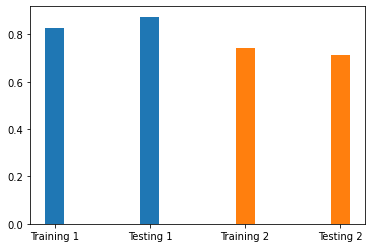

In [ ]:
knn_hep_train_acc = get_knn_acc(knn_hep_x_train, hep_y_train, knn_hep_x_train, hep_y_train, k=1, dist_fn=euclidean)
print("Training KNN accuracy of Dataset #1: " + str(knn_hep_train_acc))

knn_hep_test_acc = get_knn_acc(knn_hep_x_train, hep_y_train, knn_hep_x_test, hep_y_test, k=1, dist_fn=euclidean)
print("Testing KNN accuracy of Dataset #1: " + str(knn_hep_test_acc))

knn_mess_train_acc = get_knn_acc(knn_mess_x_train, mess_y_train, knn_mess_x_train, mess_y_train, k=1, dist_fn=euclidean)
print("Training KNN accuracy of Dataset #2: " + str(knn_mess_train_acc))

knn_mess_test_acc = get_knn_acc(knn_mess_x_train, mess_y_train, knn_mess_x_test, mess_y_test, k=1, dist_fn=euclidean)
print("Testing KNN accuracy of Dataset #2: " + str(knn_mess_test_acc))

plt.bar(["Training 1", "Testing 1"], [knn_hep_train_acc, knn_hep_test_acc], width=0.2)
plt.bar(["Training 2", "Testing 2"], [knn_mess_train_acc, knn_mess_test_acc], width=0.2)
plt.savefig("AccuraciesKnn.png")


Compute Accuracy for DT at maxHeight=3 and cost_fn=missclassification

Training DT accuracy of Dataset #1: 0.828125
Testing DT accuracy of Dataset #1: 0.875
Training DT accuracy of Dataset #2: 0.6401308615049073
Testing DT accuracy of Dataset #2: 0.6695652173913044


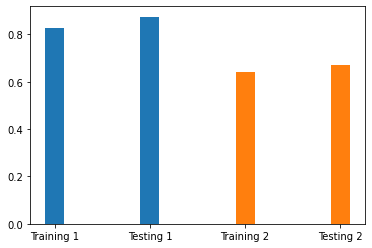

In [ ]:
dt_hep_train_acc = get_dt_acc(dt_hep_x_train, hep_y_train, dt_hep_x_train, hep_y_train, d=3, cost_fn=missclassification)
print("Training DT accuracy of Dataset #1: " + str(dt_hep_train_acc))

dt_hep_test_acc = get_dt_acc(dt_hep_x_train, hep_y_train, dt_hep_x_test, hep_y_test, d=3, cost_fn=missclassification)
print("Testing DT accuracy of Dataset #1: " + str(dt_hep_test_acc))

dt_mess_train_acc = get_dt_acc(dt_mess_x_train, mess_y_train, dt_mess_x_train, mess_y_train, d=3, cost_fn=missclassification)
print("Training DT accuracy of Dataset #2: " + str(dt_mess_train_acc))

dt_mess_test_acc = get_dt_acc(dt_mess_x_train, mess_y_train, dt_mess_x_test, mess_y_test, d=3, cost_fn=missclassification)
print("Testing DT accuracy of Dataset #2: " + str(dt_mess_test_acc))

plt.bar(["Training 1", "Testing 1"], [dt_hep_train_acc, dt_hep_test_acc], width=0.2)
plt.bar(["Training 2", "Testing 2"], [dt_mess_train_acc, dt_mess_test_acc], width=0.2)
plt.savefig("Accuracies.png")

split training into training and validation

In [ ]:
# split training into training and validation for knn
knn_hep_x_train_tr, knn_hep_x_train_va, hep_y_train_tr, hep_y_train_va = \
train_test_split(knn_hep_x_train, hep_y_train, test_size=0.4, random_state=1, shuffle=True)

knn_mess_x_train_tr, knn_mess_x_train_va, mess_y_train_tr, mess_y_train_va = \
train_test_split(knn_mess_x_train, mess_y_train, test_size=0.4, random_state=1, shuffle=True)

# split training into training and validation for dt
dt_hep_x_train_tr, dt_hep_x_train_va, hep_y_train_tr, hep_y_train_va = \
train_test_split(dt_hep_x_train, hep_y_train, test_size=0.4, random_state=1, shuffle=True)

dt_mess_x_train_tr, dt_mess_x_train_va, mess_y_train_tr, mess_y_train_va = \
train_test_split(dt_mess_x_train, mess_y_train, test_size=0.4, random_state=1, shuffle=True)

Test different K values

Best K for dataset #1: 1, Test accuracy: 0.5625
Best K for dataset #2: 1, Test accuracy: 0.6434782608695652


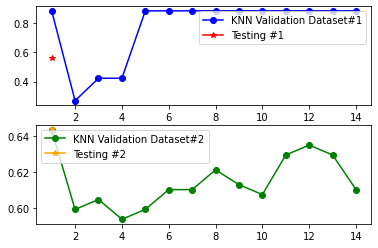

In [ ]:
hep_k_choice = []
hep_k_acc = []
mess_k_choice = []
mess_k_acc = []

for k in range(1,15):
  acc = get_knn_acc(knn_hep_x_train_tr, hep_y_train_tr, knn_hep_x_train_va, hep_y_train_va, k=k, dist_fn=euclidean)
  hep_k_choice.append(k)
  hep_k_acc.append(acc)

  acc = get_knn_acc(knn_mess_x_train_tr, mess_y_train_tr, knn_mess_x_train_va, mess_y_train_va, k=k, dist_fn=euclidean)
  mess_k_choice.append(k)
  mess_k_acc.append(acc)

# use best k on test data
best_hep_k = hep_k_choice[hep_k_acc.index(max(hep_k_acc))]
best_hep_knn_acc = get_knn_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, k=best_hep_k, dist_fn=euclidean)
print("Best K for dataset #1: " + str(best_hep_k) + ", Test accuracy: " + str(best_hep_knn_acc))

best_mess_k = mess_k_choice[mess_k_acc.index(max(mess_k_acc))]
best_mess_knn_acc = get_knn_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, k=best_mess_k, dist_fn=euclidean)
print("Best K for dataset #2: " + str(best_mess_k) + ", Test accuracy: " + str(best_mess_knn_acc))

# plot the results
fig, axs = plt.subplots(2)
axs[0].plot(hep_k_choice, hep_k_acc, marker='o', color='blue', label='KNN Validation Dataset#1')
axs[0].plot(best_hep_k, best_hep_knn_acc, marker='*', color='red', label='Testing #1')
axs[0].xlabel='k'
axs[0].ylabel='Accuracy'
axs[0].legend(loc='best')

axs[1].plot(mess_k_choice, mess_k_acc, marker='o', color='green', label='KNN Validation Dataset#2')
axs[1].plot(best_mess_k, best_mess_knn_acc, marker='*', color='orange', label='Testing #2')
axs[1].xlabel='k'
axs[1].ylabel='Accuracy'
axs[1].legend(loc='best')
plt.savefig('KNN_chooseK.png',dpi=300)


Check different tree depth

Best max_depth for dataset #1: 1, Test accuracy: 0.6875
Best max_depth for dataset #2: 2, Test accuracy: 0.5782608695652174


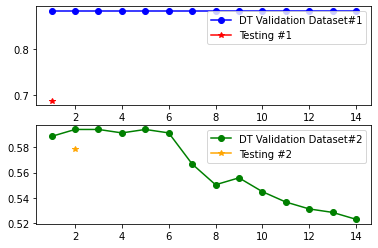

In [ ]:
hep_d_choice = []
hep_d_acc = []
mess_d_choice = []
mess_d_acc = []

for d in range(1,15):
  acc = get_dt_acc(dt_hep_x_train_tr, hep_y_train_tr, dt_hep_x_train_va, hep_y_train_va, d=d, cost_fn=missclassification)
  hep_d_choice.append(d)
  hep_d_acc.append(acc)

  acc = get_dt_acc(dt_mess_x_train_tr, mess_y_train_tr, dt_mess_x_train_va, mess_y_train_va, d=d, cost_fn=missclassification)
  mess_d_choice.append(d)
  mess_d_acc.append(acc)

# use best d on test data
best_hep_d = hep_d_choice[hep_d_acc.index(max(hep_d_acc))]
best_hep_dt_acc = get_dt_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, d=best_hep_d, cost_fn=missclassification)
print("Best max_depth for dataset #1: " + str(best_hep_d) + ", Test accuracy: " + str(best_hep_dt_acc))

best_mess_d = mess_d_choice[mess_d_acc.index(max(mess_d_acc))]
best_mess_dt_acc = get_dt_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, d=best_mess_d, cost_fn=missclassification)
print("Best max_depth for dataset #2: " + str(best_mess_d) + ", Test accuracy: " + str(best_mess_dt_acc))

fig, axs = plt.subplots(2)
axs[0].plot(hep_d_choice, hep_d_acc, marker='o', color='blue', label='DT Validation Dataset#1')
axs[0].plot(best_hep_d, best_hep_dt_acc, marker='*', color='red', label='Testing #1')
axs[0].xlabel='max_depth'
axs[0].ylabel='Accuracy'
axs[0].legend(loc='best')

axs[1].plot(mess_d_choice, mess_d_acc, marker='o', color='green', label='DT Validation Dataset#2')
axs[1].plot(best_mess_d, best_mess_dt_acc, marker='*', color='orange', label='Testing #2')
axs[1].xlabel='max_depth'
axs[1].ylabel='Accuracy'
axs[1].legend(loc='best')
plt.savefig('DT_chooseD.png',dpi=300)  

Trying out different distance functions

Best K for dataset #1 with euclidean distance: 1, Test accuracy: 0.5625
Best K for dataset #1 with manhattan distance: 1, Test accuracy: 0.5
Best K for dataset #2 with euclidean distance: 1, Test accuracy: 0.6434782608695652
Best K for dataset #2 with manhattan distance: 13, Test accuracy: 0.7086956521739131


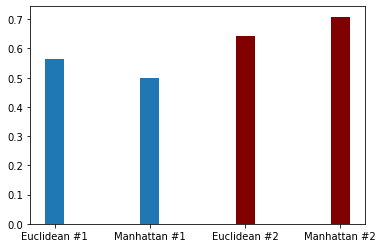

In [ ]:
hep_k_choice = []
hep_k_acc = []
mess_k_choice = []
mess_k_acc = []

for k in range(1,15):
  acc = get_knn_acc(knn_hep_x_train_tr, hep_y_train_tr, knn_hep_x_train_va, hep_y_train_va, k=k, dist_fn=manhattan)
  hep_k_choice.append(k)
  hep_k_acc.append(acc)

  acc = get_knn_acc(knn_mess_x_train_tr, mess_y_train_tr, knn_mess_x_train_va, mess_y_train_va, k=k, dist_fn=manhattan)
  mess_k_choice.append(k)
  mess_k_acc.append(acc)

# use best k on test data
best_hep_k_manh = hep_k_choice[hep_k_acc.index(max(hep_k_acc))]
best_hep_knn_acc_manh = get_knn_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, k=best_hep_k_manh, dist_fn=manhattan)
print("Best K for dataset #1 with euclidean distance: " + str(best_hep_k) + ", Test accuracy: " + str(best_hep_knn_acc))
print("Best K for dataset #1 with manhattan distance: " + str(best_hep_k_manh) + ", Test accuracy: " + str(best_hep_knn_acc_manh))

best_mess_k_manh = mess_k_choice[mess_k_acc.index(max(mess_k_acc))]
best_mess_knn_acc_manh = get_knn_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, k=best_mess_k_manh, dist_fn=manhattan)
print("Best K for dataset #2 with euclidean distance: " + str(best_mess_k) + ", Test accuracy: " + str(best_mess_knn_acc))
print("Best K for dataset #2 with manhattan distance: " + str(best_mess_k_manh) + ", Test accuracy: " + str(best_mess_knn_acc_manh))

plt.bar(['Euclidean #1', 'Manhattan #1'], [best_hep_knn_acc, best_hep_knn_acc_manh], width=0.2)
plt.xlabel = 'Distance function'
plt.ylabel = 'Accuracy at best K'
plt.bar(['Euclidean #2', 'Manhattan #2'], [best_mess_knn_acc, best_mess_knn_acc_manh], width = 0.2, color='maroon')
plt.savefig('KNN_diff_cost_Fn.png')

Trying out different cost functions

Best max_depth for dataset #1 with missclassification: 1, Test accuracy: 0.6875
Best max_depth for dataset #1 with entropy: 1, Test accuracy: 0.6875
Best max_depth for dataset #1 with gini index: 1, Test accuracy: 0.6875
Best max_depth for dataset #2 with missclassification: 2, Test accuracy: 0.5782608695652174
Best max_depth for dataset #2 with entropy: 1, Test accuracy: 0.5521739130434783
Best max_depth for dataset #2 with gini index: 1, Test accuracy: 0.5521739130434783


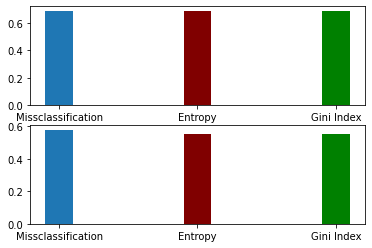

In [ ]:
hep_d_choice_ent = []
hep_d_acc_ent = []
hep_d_choice_gini = []
hep_d_acc_gini = []

mess_d_choice_ent = []
mess_d_acc_ent = []
mess_d_choice_gini = []
mess_d_acc_gini = []

for k in range(1,15):
  acc = get_dt_acc(dt_hep_x_train_tr, hep_y_train_tr, dt_hep_x_train_va, hep_y_train_va, d=d, cost_fn=entropy)
  hep_d_choice_ent.append(k)
  hep_d_acc_ent.append(acc)
  acc = get_dt_acc(dt_hep_x_train_tr, hep_y_train_tr, dt_hep_x_train_va, hep_y_train_va, d=d, cost_fn=gini_index)
  hep_d_choice_gini.append(k)
  hep_d_acc_gini.append(acc)

  acc = get_dt_acc(dt_mess_x_train_tr, mess_y_train_tr, dt_mess_x_train_va, mess_y_train_va, d=d, cost_fn=entropy)
  mess_d_choice_ent.append(k)
  mess_d_acc_ent.append(acc)
  acc = get_dt_acc(dt_mess_x_train_tr, mess_y_train_tr, dt_mess_x_train_va, mess_y_train_va, d=d, cost_fn=gini_index)
  mess_d_choice_gini.append(k)
  mess_d_acc_gini.append(acc)

# use best d on test data
best_hep_d_ent = hep_d_choice_ent[hep_d_acc_ent.index(max(hep_d_acc_ent))]
best_hep_dt_acc_ent = get_dt_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, d=best_hep_d_ent, cost_fn=entropy)
best_hep_d_gini = hep_d_choice_gini[hep_d_acc_gini.index(max(hep_d_acc_gini))]
best_hep_dt_acc_gini = get_dt_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, d=best_hep_d_gini, cost_fn=gini_index)
print("Best max_depth for dataset #1 with missclassification: " + str(best_hep_d) + ", Test accuracy: " + str(best_hep_dt_acc))
print("Best max_depth for dataset #1 with entropy: " + str(best_hep_d_ent) + ", Test accuracy: " + str(best_hep_dt_acc_ent))
print("Best max_depth for dataset #1 with gini index: " + str(best_hep_d_gini) + ", Test accuracy: " + str(best_hep_dt_acc_gini))

best_mess_d_ent = mess_d_choice_ent[mess_d_acc_ent.index(max(mess_d_acc_ent))]
best_mess_dt_acc_ent = get_dt_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, d=best_mess_d_ent, cost_fn=entropy)
best_mess_d_gini = mess_d_choice_gini[mess_d_acc_gini.index(max(mess_d_acc_gini))]
best_mess_dt_acc_gini = get_dt_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, d=best_mess_d_gini, cost_fn=gini_index)
print("Best max_depth for dataset #2 with missclassification: " + str(best_mess_d) + ", Test accuracy: " + str(best_mess_dt_acc))
print("Best max_depth for dataset #2 with entropy: " + str(best_mess_d_ent) + ", Test accuracy: " + str(best_mess_dt_acc_ent))
print("Best max_depth for dataset #2 with gini index: " + str(best_mess_d_gini) + ", Test accuracy: " + str(best_mess_dt_acc_gini))

fig, axs = plt.subplots(2)
axs[0].bar(['Missclassification'], [best_hep_dt_acc], width=0.2)
axs[0].bar(['Entropy'], [best_hep_dt_acc_ent], color='maroon', width=0.2)
axs[0].bar(['Gini Index'], [best_hep_dt_acc_gini], color='green', width=0.2)
axs[0].xlabel = 'Cost Function'
axs[0].ylabel = 'Accuracy'
axs[0].legend = 'best'

axs[1].bar(['Missclassification'], [best_mess_dt_acc], width=0.2)
axs[1].bar(['Entropy'], [best_mess_dt_acc_ent], color='maroon', width=0.2)
axs[1].bar(['Gini Index'], [best_mess_dt_acc_gini], color='green', width=0.2)
axs[1].xlabel = 'Cost Function'
axs[1].ylabel = 'Accuracy'
axs[1].legend = 'best'

plt.savefig('DT_diff_cost_fn.png')

Decision boundaries for Dataset #1 with KNN

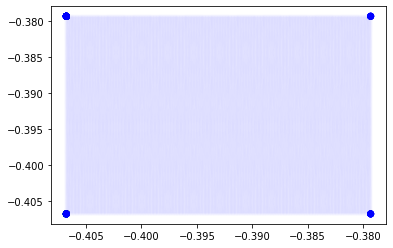

In [ ]:
x0v = np.linspace(np.min(hep_norm[:,knn_hep_att1+1]), np.max(hep_norm[:,knn_hep_att1+1]), 200)
x1v = np.linspace(np.min(hep_norm[:,knn_hep_att2+1]), np.max(hep_norm[:,knn_hep_att2+1]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

hep_y_prob_all, _ = KNN().fit(knn_hep_x_train, hep_y_train, k=best_hep_k).predict(x_all)
y_pred_all = np.zeros_like(hep_y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(hep_y_prob_all, axis=-1)] = 1

y_train_prob = np.zeros((hep_y_train.shape[0], int(np.max(hep_norm[:,0]+1))))
y_train_prob[np.arange(hep_y_train.shape[0]), hep_y_train] = 1


plt.clf()
plt.scatter(knn_hep_x_train[:,0], knn_hep_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.savefig("Decision_boundary_knn_hep.png", dpi=300, bbox_inches='tight')

Decision Boundary for Dataset #1 with DT

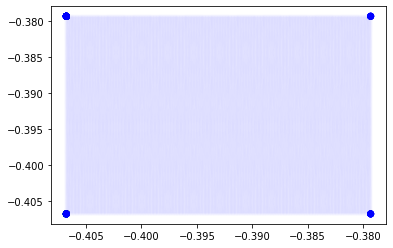

In [ ]:
x0v = np.linspace(np.min(hep_norm[:,dt_hep_att1+1]), np.max(hep_norm[:,dt_hep_att1+1]), 200)
x1v = np.linspace(np.min(hep_norm[:,dt_hep_att2+1]), np.max(hep_norm[:,dt_hep_att2+1]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

hep_y_prob_all = DecisionTree(max_depth=best_hep_d).fit(dt_hep_x_train, hep_y_train).predict(x_all)
y_pred_all = np.zeros_like(hep_y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(hep_y_prob_all, axis=-1)] = 1

y_train_prob = np.zeros((hep_y_train.shape[0], int(np.max(hep_norm[:,0]+1))))
y_train_prob[np.arange(hep_y_train.shape[0]), hep_y_train] = 1


plt.clf()
plt.scatter(dt_hep_x_train[:,0], dt_hep_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.savefig("Decision_boundary_dt_hep.png", dpi=300, bbox_inches='tight')

Decision Boundary for Dataset #2 with KNN

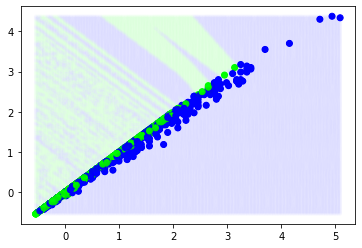

In [ ]:
x0v = np.linspace(np.min(mess_norm[:,knn_mess_att1]), np.max(mess_norm[:,knn_mess_att1]), 200)
x1v = np.linspace(np.min(mess_norm[:,knn_mess_att2]), np.max(mess_norm[:,knn_mess_att2]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

mess_y_prob_all, _ = KNN().fit(knn_mess_x_train, mess_y_train, k=best_mess_k).predict(x_all)
y_pred_all = np.zeros_like(mess_y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(mess_y_prob_all, axis=-1)] = 1

y_train_prob = np.zeros((mess_y_train.shape[0], int(np.max(mess_norm[:,-1])+1)))
y_train_prob[np.arange(mess_y_train.shape[0]), mess_y_train] = 1


plt.clf()
plt.scatter(knn_mess_x_train[:,0], knn_mess_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.savefig("Decision_boundary_knn_mess.png", dpi=300, bbox_inches='tight')

Decision Boundary for Dataset #2 with DT

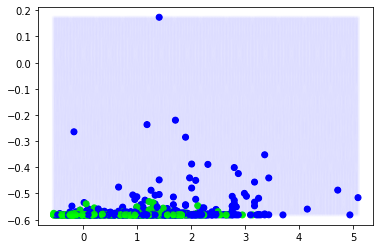

In [ ]:
x0v = np.linspace(np.min(mess_norm[:,dt_mess_att1]), np.max(mess_norm[:,dt_mess_att1]), 200)
x1v = np.linspace(np.min(mess_norm[:,dt_mess_att2]), np.max(mess_norm[:,dt_mess_att2]), 200)

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

mess_y_prob_all = DecisionTree(max_depth=best_mess_d).fit(dt_mess_x_train, mess_y_train).predict(x_all)
y_pred_all = np.zeros_like(mess_y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(mess_y_prob_all, axis=-1)] = 1

y_train_prob = np.zeros((mess_y_train.shape[0], int(np.max(mess_norm[:,-1]+1))))
y_train_prob[np.arange(mess_y_train.shape[0]), mess_y_train] = 1


plt.clf()
plt.scatter(dt_mess_x_train[:,0], dt_mess_x_train[:,1], c=y_train_prob, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
plt.savefig("Decision_boundary_dt_mess.png", dpi=300, bbox_inches='tight')

The key features for DT are obtained by shuffling one feature at a time and calculating the accuracy of the prediction with the shuffled feature. The lowest accuracies are those in which the shuffled feature was the most important, since not having the right values decreases the accuracy the most.

In [ ]:
print("The first key feature of Dataset #1 for DecisionTree is feature #" + str(dt_hep_att1))
print("The second key feature of Dataset #1 for DecisionTree is feature #" + str(dt_hep_att2))
print("The first key feature of Dataset #2 for DecisionTree is feature #" + str(dt_mess_att1))
print("The second key feature of Dataset #2 for DecisionTree is feature #" + str(dt_mess_att2))

The first key feature of Dataset #1 for DecisionTree is feature #1
The second key feature of Dataset #1 for DecisionTree is feature #2
The first key feature of Dataset #2 for DecisionTree is feature #1
The second key feature of Dataset #2 for DecisionTree is feature #12


The key features for KNN are obtained by shuffling one feature at a time and calculating the accuracy of the prediction with the shuffled feature. The lowest accuracies are those in which the shuffled feature was the most important, since not having the right values decreases the accuracy the most.

In [ ]:
print("The first key feature of Dataset #1 for KNN is feature #" + str(knn_hep_att1))
print("The second key feature of Dataset #1 for KNN is feature #" + str(knn_hep_att2))
print("The first key feature of Dataset #2 for KNN is feature #" + str(knn_mess_att1))
print("The second key feature of Dataset #2 for KNN is feature #" + str(knn_mess_att2))

The first key feature of Dataset #1 for KNN is feature #1
The second key feature of Dataset #1 for KNN is feature #2
The first key feature of Dataset #2 for KNN is feature #1
The second key feature of Dataset #2 for KNN is feature #7


Experiment: use all the features instead of selecting only two

In [ ]:
knn_hep_acc = get_knn_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, k=1, dist_fn=euclidean)
print("The accuracy for dataset #1 using KNN with all features: " + str(knn_hep_acc))

knn_hep_acc = get_knn_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, k=1, dist_fn=euclidean)
print("The accuracy for dataset #2 using KNN with all features: " + str(knn_hep_acc))

dt_hep_acc = get_dt_acc(hep_x_train, hep_y_train, hep_x_test, hep_y_test, d=3, cost_fn=missclassification)
print("The accuracy for dataset #1 using DecisionTree with all features: " + str(dt_hep_acc))

dt_mess_acc = get_dt_acc(mess_x_train, mess_y_train, mess_x_test, mess_y_test, d=3, cost_fn=missclassification)
print("The accuracy for dataset #2 using DecisionTree with all features: " + str(dt_mess_acc))

The accuracy for dataset #1 using KNN with all features: 0.5625
The accuracy for dataset #2 using KNN with all features: 0.6434782608695652
The accuracy for dataset #1 using DecisionTree with all features: 0.8125
The accuracy for dataset #2 using DecisionTree with all features: 0.6217391304347826


Experiment: 